**A US-based housing company has decided to enter the Australian market.<br>
The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.<br>
The company wants to know the following things about the prospective properties:**

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.metrics import r2_score,mean_squared_error

from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../input/house-price-prediction/train.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.describe(include=np.object)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


## Data Cleaning

- <b>Converting Numerical columns to categorical

In [9]:
toconvert = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
             'HalfBath','Fireplaces', 'BedroomAbvGr','KitchenAbvGr','GarageCars','TotRmsAbvGrd','MSSubClass']
df[toconvert] = df[toconvert].apply(lambda x : x.astype('object'))

### Outlier Treatment

In [10]:
df.PoolArea.unique()

array([  0, 512, 648, 576, 555, 480, 519, 738])

In [11]:
df.MiscVal.unique()

array([    0,   700,   350,   500,   400,   480,   450, 15500,  1200,
         800,  2000,   600,  3500,  1300,    54,   620,   560,  1400,
        8300,  1150,  2500])

In [12]:
df['3SsnPorch'].unique()

array([  0, 320, 407, 130, 180, 168, 140, 508, 238, 245, 196, 144, 182,
       162,  23, 216,  96, 153, 290, 304])

In [13]:
df.LowQualFinSF.unique()

array([  0, 360, 513, 234, 528, 572, 144, 392, 371, 390, 420, 473, 156,
       515,  80,  53, 232, 481, 120, 514, 397, 479, 205, 384])

In [14]:
df.drop(['PoolArea','3SsnPorch','MiscVal','LowQualFinSF','LotFrontage'],axis=1,inplace=True)

- <b>Since Pool Area, 3SsnPorch, MiscVal has very few enteries(outliers) we will drop it.

- GrLivArea

In [15]:
df.GrLivArea.describe(percentiles=[.99])

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
50%      1464.000000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64

In [16]:
Q = df.GrLivArea.quantile(.99)
df.drop(df[df.GrLivArea > Q].index ,axis=0,inplace=True)
df.shape

(1445, 76)

<AxesSubplot:ylabel='GrLivArea'>

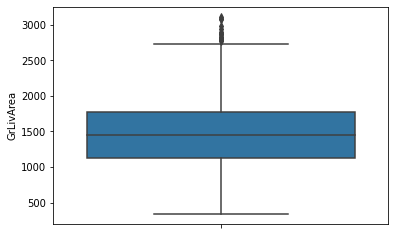

In [17]:
sns.boxplot(y=df.GrLivArea)

- LotArea

In [18]:
df.LotArea.describe(percentiles=[.95,.9,.99])

count      1445.000000
mean      10375.335640
std        9800.716633
min        1300.000000
50%        9430.000000
90%       14209.000000
95%       16878.000000
99%       33777.920000
max      215245.000000
Name: LotArea, dtype: float64

In [19]:
Q = df.LotArea.quantile(.95)

df.drop(df[df.LotArea > Q].index ,axis=0,inplace=True)
df.shape

(1372, 76)

In [20]:
df = df[df.LotArea>df.LotArea.quantile(.01)]

<AxesSubplot:ylabel='LotArea'>

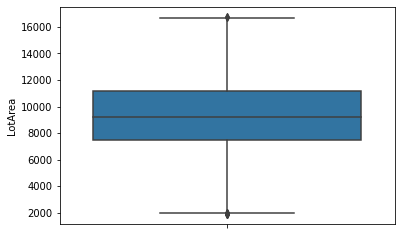

In [21]:
sns.boxplot(y=df.LotArea)

- BsmtFinSF1

In [22]:
df.BsmtFinSF1.describe(percentiles=[.70,.80,.90,.95,.99])

count    1355.000000
mean      427.873063
std       421.049517
min         0.000000
50%       379.000000
70%       646.000000
80%       783.200000
90%      1024.000000
95%      1224.200000
99%      1515.300000
max      2188.000000
Name: BsmtFinSF1, dtype: float64

In [23]:
Q = df.BsmtFinSF1.quantile(.99)
df.drop(df[df['BsmtFinSF1']>Q].index,axis=0,inplace=True)

<AxesSubplot:ylabel='BsmtFinSF1'>

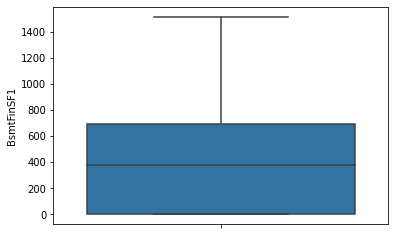

In [24]:
sns.boxplot(y=df.BsmtFinSF1)

In [25]:
df.shape

(1341, 76)

In [26]:
df.TotalBsmtSF.describe(percentiles=[.01,.02,.03,.04,.05,.70,.80,.90,.95,.99])

count    1341.000000
mean     1032.179717
std       390.221944
min         0.000000
1%          0.000000
2%          0.000000
3%        274.000000
4%        432.000000
5%        520.000000
50%       979.000000
70%      1194.000000
80%      1356.000000
90%      1563.000000
95%      1705.000000
99%      2004.400000
max      3206.000000
Name: TotalBsmtSF, dtype: float64

In [27]:
Q1 = df.TotalBsmtSF.quantile(.03)
Q = df.TotalBsmtSF.quantile(.99)
df=df[(df.TotalBsmtSF>Q1) & (df.TotalBsmtSF<Q)]

In [28]:
df.shape

(1286, 76)

<AxesSubplot:ylabel='TotalBsmtSF'>

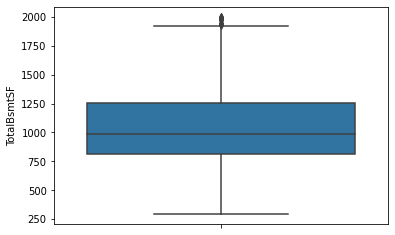

In [29]:
sns.boxplot(y=df.TotalBsmtSF)

- MasVnrArea

In [30]:
df.MasVnrArea.describe(percentiles=[.70,.80,.90,.99])

count    1280.000000
mean       95.068750
std       161.531712
min         0.000000
50%         0.000000
70%       110.600000
80%       196.000000
90%       306.300000
99%       654.470000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [31]:
df.drop(df[df['MasVnrArea']>764].index,axis=0,inplace=True)

<AxesSubplot:ylabel='MasVnrArea'>

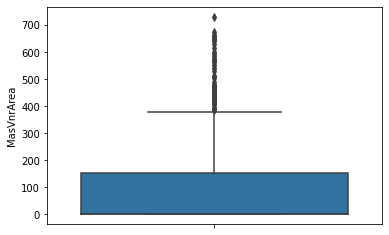

In [32]:
sns.boxplot(y=df.MasVnrArea)

In [33]:
df.shape

(1277, 76)

- OpenPorchSF

In [34]:
df.OpenPorchSF.describe(percentiles=[.70,.80,.90,.95,.99])

count    1277.000000
mean       46.042287
std        64.490976
min         0.000000
50%        25.000000
70%        56.000000
80%        81.800000
90%       130.000000
95%       170.000000
99%       275.920000
max       547.000000
Name: OpenPorchSF, dtype: float64

In [35]:
Q = df.OpenPorchSF.quantile(.99)
df.drop(df[df['OpenPorchSF']>Q].index,axis=0,inplace=True)

<AxesSubplot:ylabel='OpenPorchSF'>

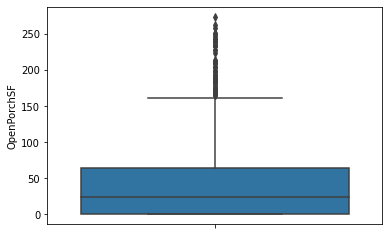

In [36]:
sns.boxplot(y=df.OpenPorchSF)

In [37]:
df.shape

(1264, 76)

- 1stFlrSF

In [38]:
df['1stFlrSF'].describe(percentiles=[.70,.80,.90,.95,.99])

count    1264.000000
mean     1128.553006
std       326.854667
min       438.000000
50%      1070.000000
70%      1268.000000
80%      1428.000000
90%      1616.000000
95%      1720.850000
99%      1974.110000
max      2898.000000
Name: 1stFlrSF, dtype: float64

In [39]:
Q = df['1stFlrSF'].quantile(.99)
df.drop(df[df['1stFlrSF']>Q].index,axis=0,inplace=True)

<AxesSubplot:ylabel='1stFlrSF'>

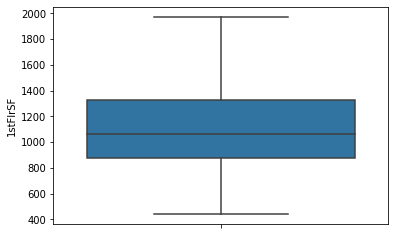

In [40]:
sns.boxplot(y=df['1stFlrSF'])

## Exploratory Data Analysis

In [41]:
#Filling Null in categorical columns according to data dictionary for better insight.
df.Alley.fillna(value='No alley access',inplace=True)

base = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
df[base] = df[base].replace(np.nan,value='No Basement')

df.FireplaceQu.fillna(value='No Fireplace',inplace=True)

gar = ['GarageType','GarageFinish','GarageQual','GarageCond']
df[gar] = df[gar].fillna(value='No Garage')

df.PoolQC.fillna(value='No Pool',inplace=True)

df.Fence.fillna(value='No Fence',inplace=True)

df.MiscFeature.fillna(value='None',inplace=True)

In [42]:
#loop for Checking how are categorical columns are distributed
cat_col = df.select_dtypes(include='object').columns

# for x in df[cat_col].columns:
#     print(df[x].value_counts(normalize=True,dropna=False)*100)
#     print('\n')

In [43]:
# Highly skewed Columns
toremove=['Street','Alley','LandContour','Utilities','LandSlope','Condition1','Condition2','RoofMatl',
          'BsmtCond','Heating','CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC',
         'MiscFeature','KitchenAbvGr','BsmtHalfBath','BsmtFinType2','ScreenPorch' , 'EnclosedPorch','BsmtFinSF2']

In [44]:
sns.set_theme(style='white')

def scatter(x):
    plt.figure(figsize=(12,4))
    plt.title('Scatter Plot of ' + x.name + ' vs ' + 'SalePrice',fontdict={'size':20,'family': 'serif'})
    sns.scatterplot(x=x,y=df['SalePrice'])

def box(x):
    plt.figure(figsize=(14,5))
    plt.title('Box Plot of ' + x.name + ' vs ' + 'SalePrice',fontdict={'size':20,'family': 'serif'})
    sns.boxplot(x=x,y=df['SalePrice'])
    sns.despine(offset=10, trim=True)

def count(x):
    plt.figure(figsize=(14,4))
    plt.title('Count Plot of ' + x.name,fontdict={'size':20,'family': 'serif'})
    sns.countplot(x) 
    sns.despine()

### Univariate

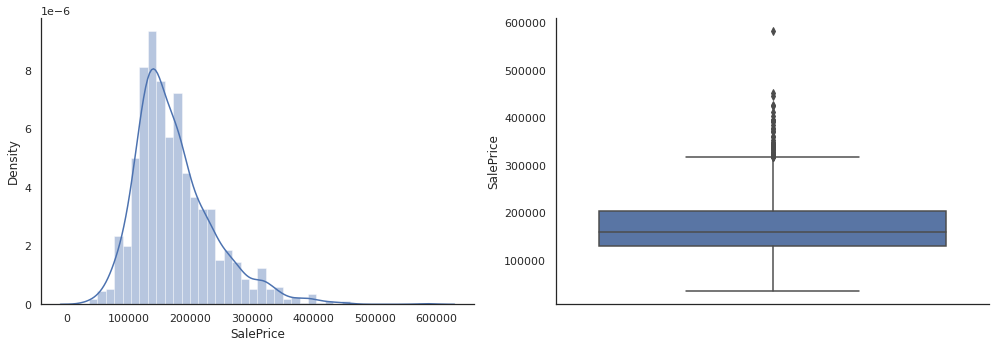

In [45]:
#SalePrice(Target Column)
f , ax = plt.subplots(1,2,figsize=(14,5))

sns.distplot(df.SalePrice,ax=ax[0])

sns.boxplot(y=df.SalePrice,ax=ax[1])
sns.despine()

plt.tight_layout()

In [46]:
df.SalePrice.describe()

count      1251.000000
mean     174138.881695
std       64321.676755
min       35311.000000
25%      130375.000000
50%      160000.000000
75%      205000.000000
max      582933.000000
Name: SalePrice, dtype: float64

- <b> SalePrice is left skewed with few outliers.
- <b>We have house ranging from 35,311 to 582,933.  

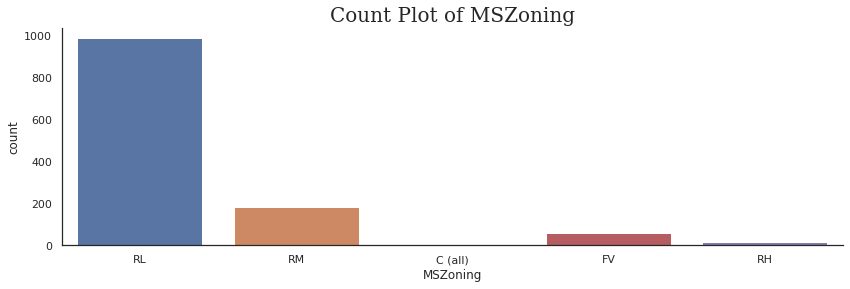

In [47]:
count(df.MSZoning)

- <b>We have mostly properties from Residential Low Density Zone 

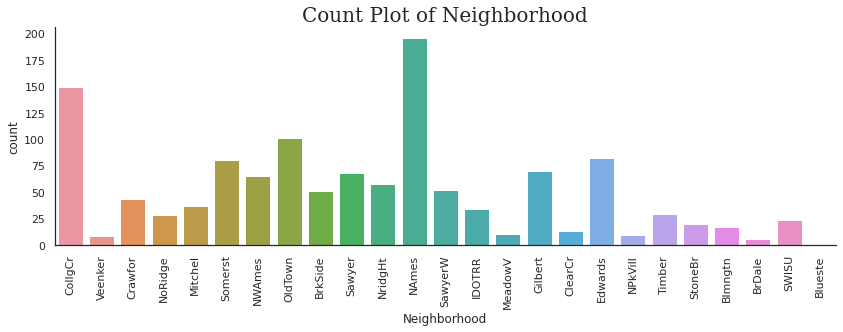

In [48]:
count(df.Neighborhood)
plt.xticks(rotation=90)
plt.show()

- <b>We have most properties from Northwest Ames.

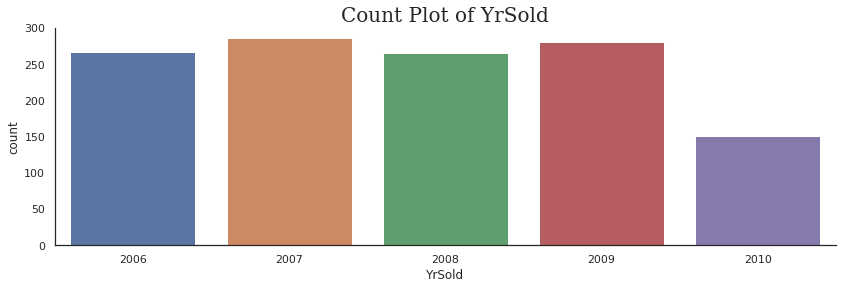

In [49]:
count(df.YrSold)

- <b>The data contains houses sold from 2006 to 2010

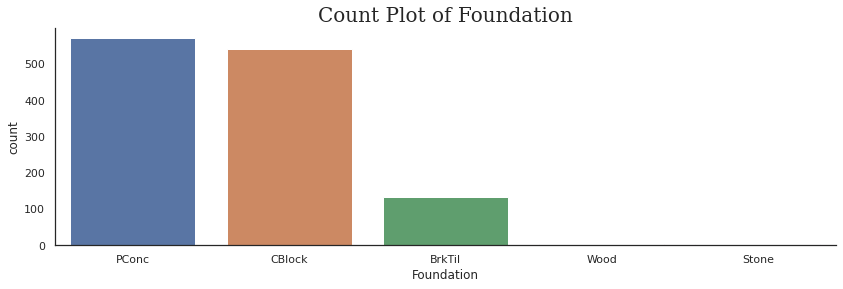

In [50]:
count(df.Foundation)

### Bivariate

- <b>Creating Age column(property age when it was sold) 

In [51]:
df['Age_When_Sold'] = df.YrSold - df.YearBuilt

In [52]:
toremove.extend(['YrSold','YearBuilt','YearRemodAdd','MoSold'])

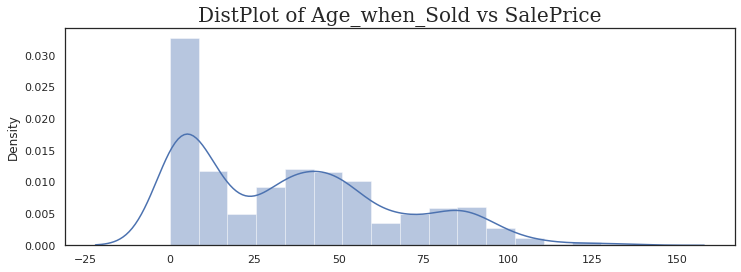

In [53]:
plt.figure(figsize=(12,4))
plt.title('DistPlot of Age_when_Sold vs SalePrice',fontdict={'size':20,'family': 'serif'})
sns.distplot(x=df.Age_When_Sold)
plt.show()

- <b> The older the Property is the cheaper it is.

- <b>Converting GarageYrBlt to Categorical column

In [54]:
df.GarageYrBlt = pd.cut(x=df['GarageYrBlt'], bins=[1900, 1940, 1960, 1980, 2000, 3000],
                        labels=['1900-1940','1940-1960','1960-1980','1980-2000','2000-2010'],
                        include_lowest=True)

df.GarageYrBlt = df.GarageYrBlt.cat.add_categories('No Garage')
df.GarageYrBlt.fillna('No Garage', inplace =True)

In [55]:
df.GarageYrBlt.value_counts(normalize=True,dropna=False)*100

2000-2010    26.618705
1960-1980    24.300560
1980-2000    21.262990
1940-1960    13.828937
1900-1940     8.952838
No Garage     5.035971
Name: GarageYrBlt, dtype: float64

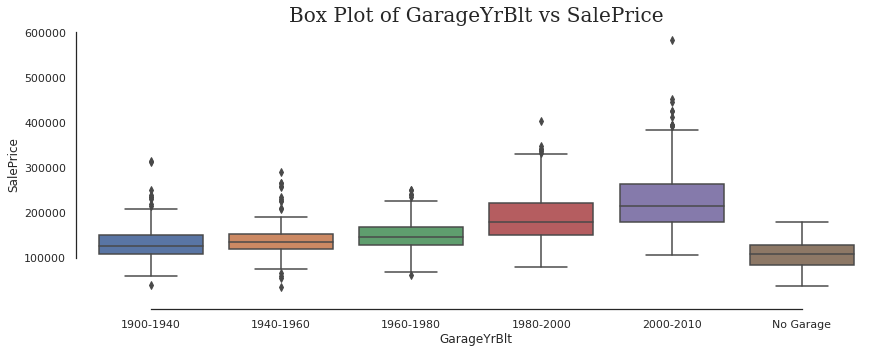

In [56]:
box(df.GarageYrBlt)

- <b>We can observe a increase in the sale price the newer the garage is.

In [57]:
# toremove.append('GarageYrBlt') #removing it after EDA

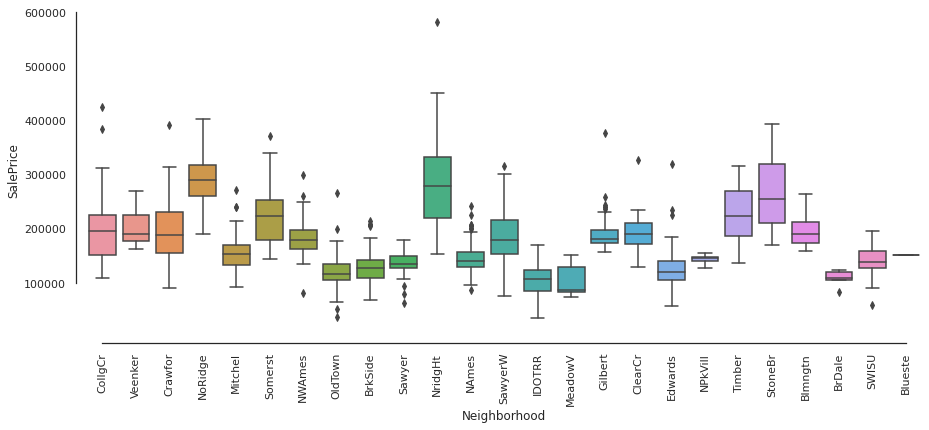

In [58]:
plt.figure(figsize=(15,6))
sns.boxplot(df.Neighborhood,y=df.SalePrice)
sns.despine(offset=10, trim=True)
plt.xticks(rotation=90)
plt.show()

- <b>We can see that Northridge(NoRidge) has the highest cost property.
- <b>Northridge Heights(NridgHt) and Stone Brook(StoneBr) are expensive neighborhoods.

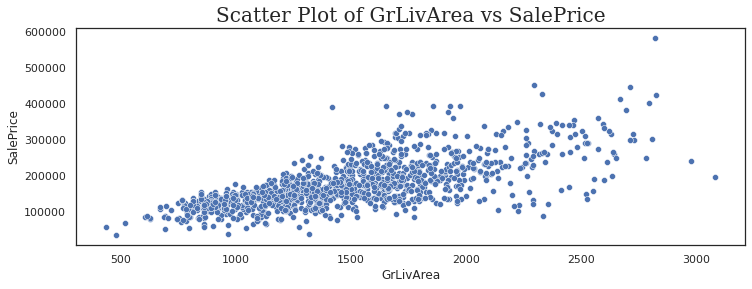

In [59]:
scatter(df.GrLivArea)

- <b>We can notice a increasing trend in above grade living area square feet.

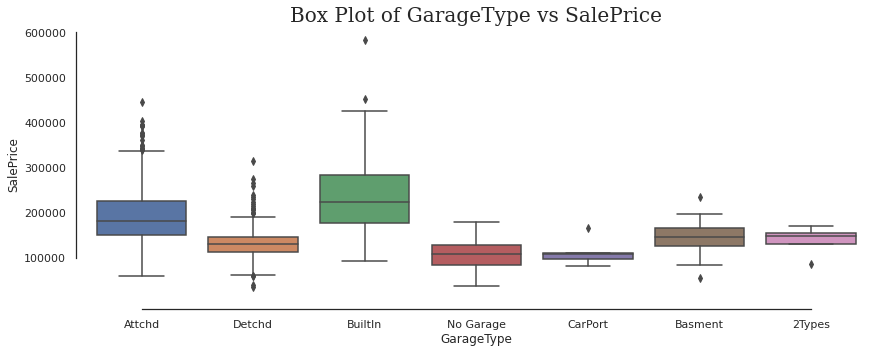

In [60]:
box(df.GarageType)

- <b>Builtin and Attached Garage lead to increase in SalePrice

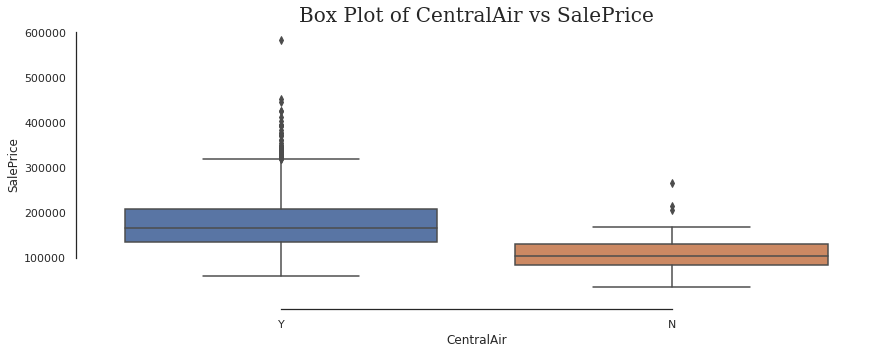

In [61]:
box(df.CentralAir)

- <b>Properties with Central Air are more expensive.

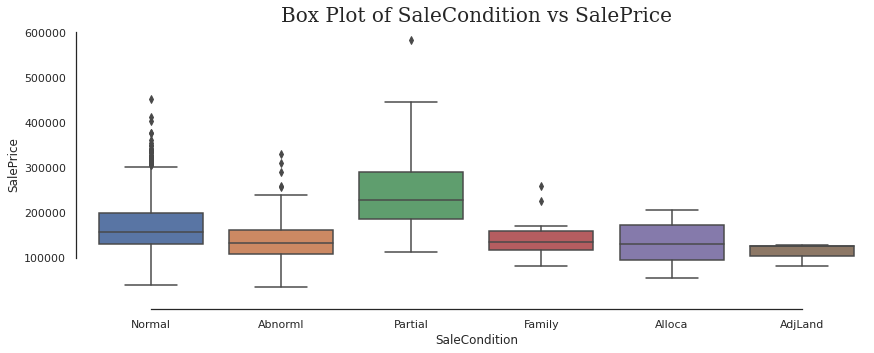

In [62]:
box(df.SaleCondition)

- <b>Partially completed properties's median price is higher than any other.

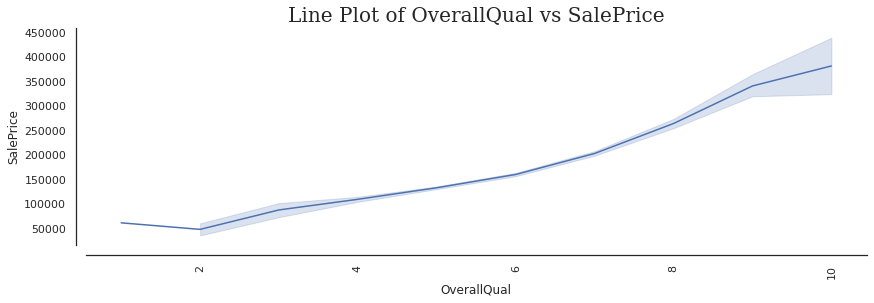

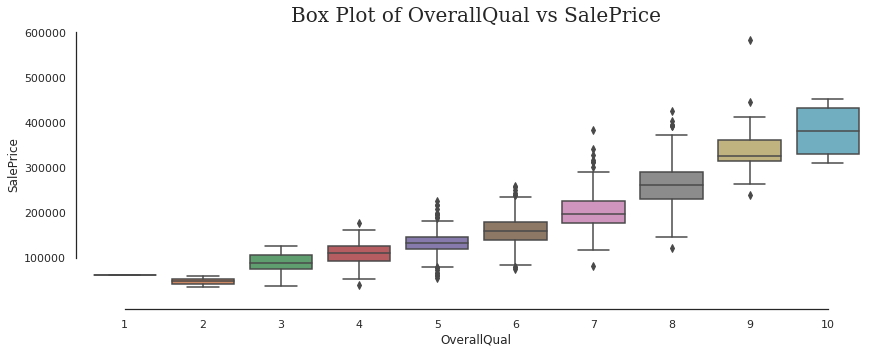

In [63]:
plt.figure(figsize=(14,4))
plt.title('Line Plot of OverallQual vs SalePrice',fontdict={'size':20,'family': 'serif'})
sns.lineplot(df.OverallQual,y=df.SalePrice)
sns.despine(offset=10)
plt.xticks(rotation=90)
box(df.OverallQual)
plt.show()

- <b>We can observe a rise in price with higher OverallQuality.

## Missing Value Treatment

In [64]:
def checkmissing():
    df_missing = (1-df.count()/len(df))*100
    print(df_missing.sort_values(ascending=False).head(10))
    #(df.isnull().mean()*100).sort_values(ascending=False).head(20)

In [65]:
checkmissing()

MasVnrType      0.479616
MasVnrArea      0.479616
Electrical      0.079936
KitchenAbvGr    0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
BedroomAbvGr    0.000000
dtype: float64


- <b>3 columns that are missing values.

- <b>Filling MasVnrType and MasVnrArea

In [66]:
df.MasVnrType.mode()

0    None
dtype: object

In [67]:
df.MasVnrType.fillna(df.MasVnrType.mode()[0],inplace=True)

In [68]:
df.MasVnrArea.fillna(df.MasVnrArea.median(),inplace=True)

In [69]:
toremove.append('Id') # Id columns is useless of modeling or eda

In [70]:
checkmissing() # Electrical will be dropped as it is skewed

Electrical      0.079936
Id              0.000000
BedroomAbvGr    0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
dtype: float64


#### No More Missing Values

## Data Preparation

In [71]:
df.drop(toremove,axis=1,inplace=True)

In [72]:
df.shape #1460-81

(1251, 48)

- <b> Dropped 219 rows and 32 columns

- <b>Binning Column values

In [73]:
# Replacing categorical column values to Others
cat_col = df.select_dtypes(include = 'object').columns
def binning(x):
    
    if x == 'Neighborhood' :
        less_than_2 = (df[x].value_counts(normalize=True)) < 0.02
        to_replace = list(less_than_2.index[np.where(less_than_2)])
        df[x].replace(to_replace,'Others',inplace=True)

    elif x in ['KitchenQual', 'BsmtFinType1' ,'BsmtExposure' , 'BsmtQual' , 'MasVnrType','OverallQual',
              'OverallCond','GarageCars', 'Fireplaces', 'HalfBath',
               'BedroomAbvGr', 'FullBath', 'BsmtFullBath']:#only 1 or very few <0.02 values 
            None
            
    else:
        less_than_4 = (df[x].value_counts(normalize=True)) < 0.04
        to_replace = list(less_than_4.index[np.where(less_than_4)])
        df[x].replace(to_replace,'Others',inplace=True)

for x in cat_col:
    binning(x)

### Correlation

<AxesSubplot:>

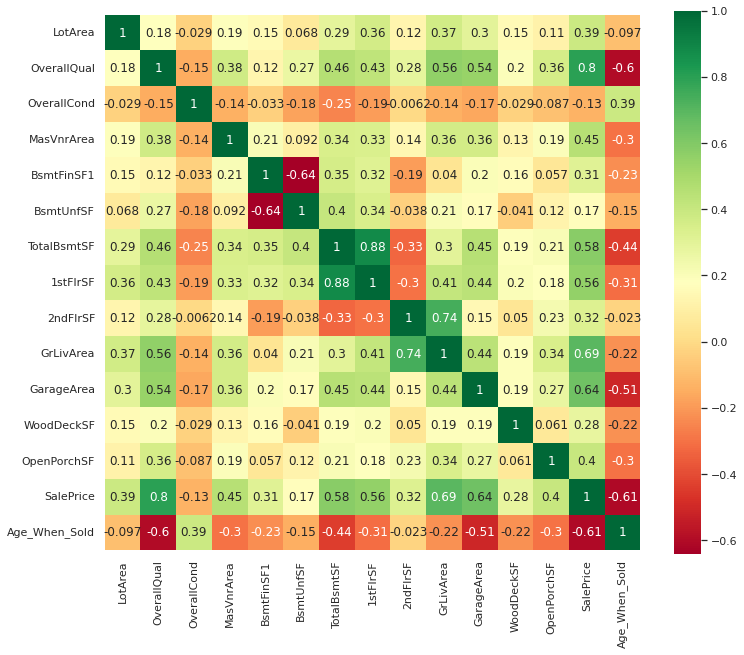

In [74]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),cmap='RdYlGn',square=True,annot=True)

- <b>Dropping highly correlated columns

In [75]:
df.drop(['1stFlrSF','BsmtFinSF1','GarageArea'],axis=1,inplace=True)

### Dummy Creation

In [76]:
df_cat= df.select_dtypes(include=['object','category'])#category for GarageYrBlt
df_cat.head()

,MSSubClass,MSZoning,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,Fence,SaleType,SaleCondition
0,60,RL,Reg,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,No,GLQ,Ex,1,2,1,3,Gd,8,0,No Fireplace,Attchd,2000-2010,RFn,2,No Fence,WD,Normal
1,20,RL,Reg,Others,Others,1Fam,1Story,Gable,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,Gd,ALQ,Ex,0,2,0,3,TA,6,1,TA,Attchd,1960-1980,RFn,2,No Fence,WD,Normal
2,60,RL,IR1,Inside,CollgCr,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Mn,GLQ,Ex,1,2,1,3,Gd,6,1,TA,Attchd,2000-2010,RFn,2,No Fence,WD,Normal
3,70,RL,IR1,Corner,Crawfor,1Fam,2Story,Gable,Wd Sdng,Others,None,TA,TA,BrkTil,TA,No,ALQ,Gd,1,1,0,3,Gd,7,1,Gd,Detchd,1980-2000,Unf,3,No Fence,WD,Abnorml
4,60,RL,IR1,Others,NoRidge,1Fam,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,Av,GLQ,Ex,1,2,1,4,Gd,9,1,TA,Attchd,1980-2000,RFn,3,No Fence,WD,Normal


In [77]:
dummy_df = pd.get_dummies(df_cat,drop_first=True)
dummy_df.head()

,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_Others,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_No Fireplace,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageYrBlt_1940-1960,GarageYrBlt_1960-1980,GarageYrBlt_1980-2000,GarageYrBlt_2000-2010,GarageYrBlt_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_MnPrv,Fence_No Fence,Fence_Others,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0


In [78]:
model_df = df.select_dtypes(exclude=['object','category'])

In [79]:
model_df = pd.concat([model_df,dummy_df],axis=1)
model_df.head()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,SalePrice,Age_When_Sold,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_Others,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_No Fireplace,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageYrBlt_1940-1960,GarageYrBlt_1960-1980,GarageYrBlt_1980-2000,GarageYrBlt_2000-2010,GarageYrBlt_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_MnPrv,Fence_No Fence,Fence_Others,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,8450,7,5,196.0,150,856,854,1710,0,61,208500,5,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
1,9600,6,8,0.0,284,1262,0,1262,298,0,181500,31,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
2,11250,7,5,162.0,434,920,866,1786,0,42,223500,7,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0
3,9550,7,5,0.0,540,756,756,1717,0,35,140000,91,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
4,14260,8,5,350.0,490,1145,1053,2198,192,84,250000,8,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0


In [80]:
model_df.shape

(1251, 139)

- 158 Columns 1241 rows

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

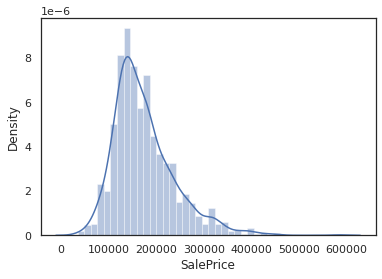

In [81]:
sns.distplot(model_df.SalePrice)

In [82]:
X = model_df.drop('SalePrice',axis=1)

y = np.log(model_df.SalePrice)
X.shape

(1251, 138)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

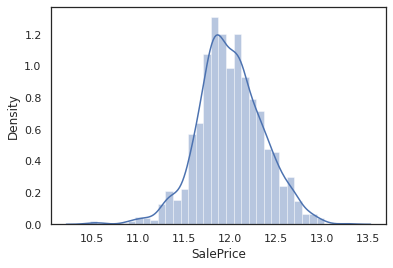

In [83]:
sns.distplot(y)

- <b>Using log Transformation since the target column isn't normally distributed.

### Train Test Split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling

In [85]:
num_cols = X.select_dtypes(include=['int64','float64']).columns

In [86]:
scaler = MinMaxScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.describe()

,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,WoodDeckSF,OpenPorchSF,Age_When_Sold,MSSubClass_30,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_80,MSSubClass_120,MSSubClass_Others,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_Others,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_Timber,BldgType_Others,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,RoofStyle_Hip,RoofStyle_Others,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Gd,HeatingQC_Others,HeatingQC_TA,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_No Fireplace,FireplaceQu_Others,FireplaceQu_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageYrBlt_1940-1960,GarageYrBlt_1960-1980,GarageYrBlt_1980-2000,GarageYrBlt_2000-2010,GarageYrBlt_No Garage,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,Fence_MnPrv,Fence_No Fence,Fence_Others,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
count,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.00000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.0,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000,875.000000
mean,0.487753,0.561397,0.577143,0.121582,0.295864,0.455114,0.216808,0.385337,0.117098,0.154340,0.274260,0.044571,0.118857,0.205714,0.038857,0.036571,0.062857,0.118857,0.016000,0.794286,0.142857,0.024000,0.644571,0.04685

In [87]:
print(X_train.shape, y_train.shape)

(875, 138) (875,)


In [88]:
print(X_test.shape, y_test.shape)

(376, 138) (376,)


## Model Building and Evaluation

### Recursive feature selection

In [89]:
lm = LinearRegression()
rfe = RFECV(estimator=lm,cv=4)

rfe.fit(X_train, y_train)

rfe.n_features_

49

In [90]:
col = X_train.columns[rfe.support_]

rfe_df = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)), columns=['Variable', 'rfe_support', 'rfe_ranking'])
rfe_df = rfe_df.loc[rfe_df['rfe_support'] == True]
rfe_df.reset_index(drop=True, inplace=True)

rfe_df

,Variable,rfe_support,rfe_ranking
0,LotArea,True,1
1,OverallQual,True,1
2,OverallCond,True,1
3,BsmtUnfSF,True,1
4,TotalBsmtSF,True,1
5,GrLivArea,True,1
6,WoodDeckSF,True,1
7,Age_When_Sold,True,1
8,MSSubClass_50,True,1
9,MSSubClass_80,True,1


- <b>Selecting top 52 Features for futher analysis.

In [91]:
X_train_rfe = X_train[col]

### Ridge Regression

In [92]:
params = {'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 
                   0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid= params,
                       scoring = 'neg_mean_absolute_error',
                       n_jobs=-1,
                       return_train_score=True,
                       verbose=1)

model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
model_cv.best_estimator_

Ridge()

In [94]:
pd.DataFrame(model_cv.cv_results_)[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_alpha,mean_train_score,mean_test_score,rank_test_score
13,1.0,-0.072223,-0.079128,1
12,0.9,-0.072157,-0.079150,2
11,0.8,-0.072095,-0.079190,3
10,0.7,-0.072038,-0.079237,4
9,0.6,-0.071992,-0.079298,5
14,2.0,-0.073167,-0.079315,6
8,0.5,-0.071955,-0.079386,7
7,0.4,-0.071932,-0.079517,8
6,0.3,-0.071923,-0.079679,9
5,0.2,-0.071923,-0.079864,10


In [95]:
ridge = model_cv.best_estimator_
# ridge = Ridge(alpha=2.0)
ridge.fit(X_train_rfe,y_train)

Ridge()

In [96]:
X_test[num_cols] = scaler.transform(X_test[num_cols])
X_test_rfe = X_test[col]

In [97]:
#Predictions
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

ridge_metric = []

#R-Squared Train
r2_train_lr = r2_score(y_train,y_pred_train)
print(r2_train_lr)
ridge_metric.append(r2_train_lr)

#R-Squared Test
r2_test_lr = r2_score(y_test,y_pred_test)
print(r2_train_lr)
ridge_metric.append(r2_test_lr)

#Residual Sum of Square Train
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
ridge_metric.append(rss1_lr)

#Residual Sum of Square Test
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
ridge_metric.append(rss2_lr)

#Mean Squared Error Train
mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

#MEan Squared Error Test
mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

0.9132153877078468
0.9132153877078468
9.5239198073388
5.487069883769429
0.010884479779815772
0.014593270967471886


### Ridge Model Evaluation

In [98]:
y_res = y_train - y_pred_train

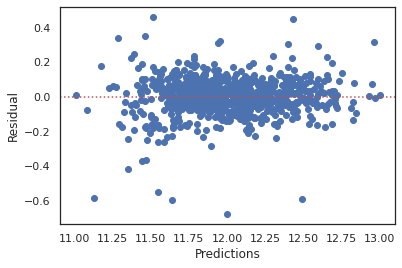

In [99]:
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

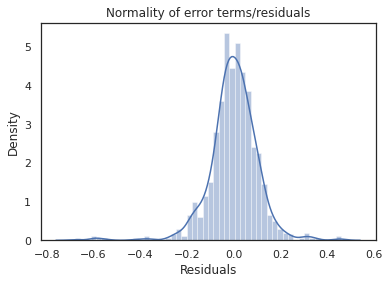

In [100]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

### Lasso Regression

In [101]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)            

model_cv.fit(X_train_rfe, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [102]:
# Printing the best hyperparameter alpha
print(model_cv.best_estimator_)

Lasso(alpha=0.0001)


In [103]:
pd.DataFrame(model_cv.cv_results_)[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_alpha,mean_train_score,mean_test_score,rank_test_score
0,0.0001,-0.072094,-0.079848,1
1,0.001,-0.076373,-0.081148,2
2,0.01,-0.117803,-0.120483,3
3,0.05,-0.222565,-0.223931,4
4,0.1,-0.278286,-0.278522,5
25,100,-0.278632,-0.278825,6
24,50,-0.278632,-0.278825,6
23,20,-0.278632,-0.278825,6
22,10.0,-0.278632,-0.278825,6
21,9.0,-0.278632,-0.278825,6


In [104]:
lasso = model_cv.best_estimator_

lasso.fit(X_train_rfe, y_train) 

Lasso(alpha=0.0001)

In [105]:
X_test_rfe

,LotArea,OverallQual,OverallCond,BsmtUnfSF,TotalBsmtSF,GrLivArea,WoodDeckSF,Age_When_Sold,MSSubClass_50,MSSubClass_80,MSSubClass_Others,MSZoning_Others,LotConfig_Others,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Mitchel,Neighborhood_NWAmes,Neighborhood_OldTown,Neighborhood_SawyerW,HouseStyle_1Story,HouseStyle_2Story,RoofStyle_Others,Exterior1st_VinylSd,Exterior2nd_VinylSd,Foundation_Others,Foundation_PConc,BsmtExposure_No Basement,BsmtFullBath_2,FullBath_3,HalfBath_2,BedroomAbvGr_6,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_9,TotRmsAbvGrd_Others,Fireplaces_3,GarageType_No Garage,GarageType_Others,GarageYrBlt_No Garage,GarageFinish_No Garage,GarageCars_1,GarageCars_3,GarageCars_4,Fence_Others,SaleCondition_Normal,SaleCondition_Partial
840,0.690289,0.555556,0.875,0.266667,0.232219,0.394856,0.000000,0.614815,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1450,0.478558,0.444444,0.500,0.463049,0.368389,0.512103,0.043478,0.259259,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0
1242,0.587612,0.666667,0.625,0.000000,0.463830,0.277988,0.000000,0.266667,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1054,0.637407,0.777778,0.500,0.068734,0.471125,0.586611,0.270380,0.029630,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1295,0.438293,0.444444,0.500,0.018605,0.463222,0.232224,0.483696,0.281481,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,0.466076,0.666667,0.500,0.139535,0.798784,0.440998,0.167120,0.022222,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
717,0.545668,0.444444,0.625,0.047545,0.538602,0.279879,0.304348,0.259259,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1258,0.517952,0.666667,0.500,0.103876,0.344073,0.275340,0.288043,0.022222,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
811,0.172405,0.555556,0.500,0.096124,0.339210,0.155068,0.190217,0.029630,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [106]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9137753483203097
0.889833531544595
9.46246859118989
5.314482878955257
0.01081424981850273
0.014134262975944832


### Lasso Model Evaluation

In [107]:
y_res = y_train - y_pred_train

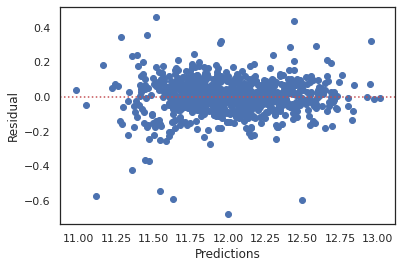

In [108]:
plt.scatter( y_pred_train , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

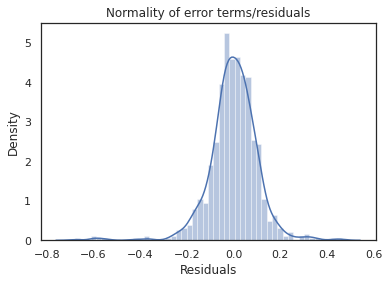

In [109]:
# Distribution of errors
p = sns.distplot(y_res,kde=True)

p = plt.title('Normality of error terms/residuals')
plt.xlabel("Residuals")
plt.show()

- <b> Metric comparision between Ridge and Lasso

In [110]:
# Creating a table which contain all the metrics

lr_table = pd.DataFrame({'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)']})

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_table,rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.913215,0.913775
1,R2 Score (Test),0.886256,0.889834
2,RSS (Train),9.523920,9.462469
3,RSS (Test),5.487070,5.314483
4,RMSE (Train),0.104329,0.103992
5,RMSE (Test),0.120803,0.118888


In [111]:
top10 = pd.DataFrame({'Features':X_train_rfe.columns,'Correlation':ridge.coef_})
top10['sort'] = top10.Correlation.map(lambda x : np.abs(x))
top10_ridge = top10.sort_values('sort',ascending=False,ignore_index=True).head(10)

In [112]:
top10 = pd.DataFrame({'Features':X_train_rfe.columns,'Correlation':lasso.coef_})
top10['sort'] = top10.Correlation.map(lambda x : np.abs(x))
top10_lasso = top10.sort_values('sort',ascending=False,ignore_index=True).head(10)

In [113]:
top10_lasso.Features.iloc[:5].values

array(['GrLivArea', 'OverallQual', 'Age_When_Sold', 'TotalBsmtSF',
       'OverallCond'], dtype=object)

In [114]:
top10_lasso.iloc[:,:2]

,Features,Correlation
0,GrLivArea,0.733558
1,OverallQual,0.470663
2,Age_When_Sold,-0.431418
3,TotalBsmtSF,0.374320
4,OverallCond,0.359483
5,BsmtUnfSF,-0.193782
6,LotArea,0.155855
7,KitchenQual_Fa,-0.152967
8,Neighborhood_Crawfor,0.151531
9,SaleCondition_Partial,0.114796


In [117]:
top10_ridge.iloc[:,:2]

,Features,Correlation
0,GrLivArea,0.650290
1,OverallQual,0.446275
2,Age_When_Sold,-0.395515
3,TotalBsmtSF,0.392232
4,OverallCond,0.326162
5,BsmtUnfSF,-0.185278
6,KitchenQual_Fa,-0.165063
7,LotArea,0.163189
8,Neighborhood_Crawfor,0.153074
9,KitchenQual_TA,-0.119856


### Top 10 Feature with Ridge and their correlation
- <b> Best alpha for ridge = 1.0

|No. |Features|Correlation
| ---| --- | --- |
|0|GrLivArea|0.650290
|1|OverallQual|0.446275
|2|Age_When_Sold|-0.395515
|3|TotalBsmtSF|0.392232
|4|OverallCond|0.326162
|5|BsmtUnfSF|-0.185278
|6|KitchenQual_Fa|-0.165063
|7|LotArea|0.163189
|8|Neighborhood_Crawfor|0.153074
|9|KitchenQual_TA|-0.119856

### Top 10 Feature with Lasso and their correlation
- <b>Best alpha for lasso = 0.0001

| No. | Features | Correlation|
| ---| --- | --- |
|0|GrLivArea|0.733558
|1|OverallQual|0.470663
|2|Age_When_Sold|-0.431418
|3|TotalBsmtSF|0.374320
|4|OverallCond|0.359483
|5|BsmtUnfSF|-0.193782
|6|LotArea|0.155855
|7|KitchenQual_Fa|-0.152967
|8|Neighborhood_Crawfor|0.151531
|9|SaleCondition_Partial|0.114796